<a href="https://colab.research.google.com/github/gauravnsanghvi/loksabha2024dataanalytics/blob/main/loksabha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install bs4

                                 Party  Won Leading Total
0         Bharatiya Janata Party - BJP  240       0   240
1       Indian National Congress - INC   99       0    99
2                 Samajwadi Party - SP   37       0    37
3  All India Trinamool Congress - AITC   29       0    29
4      Dravida Munnetra Kazhagam - DMK   22       0    22
                            Party  Won Leading Total
0    Bharatiya Janata Party - BJP  240       0   240
1  Indian National Congress - INC   99       0    99
2            Samajwadi Party - SP   37       0    37


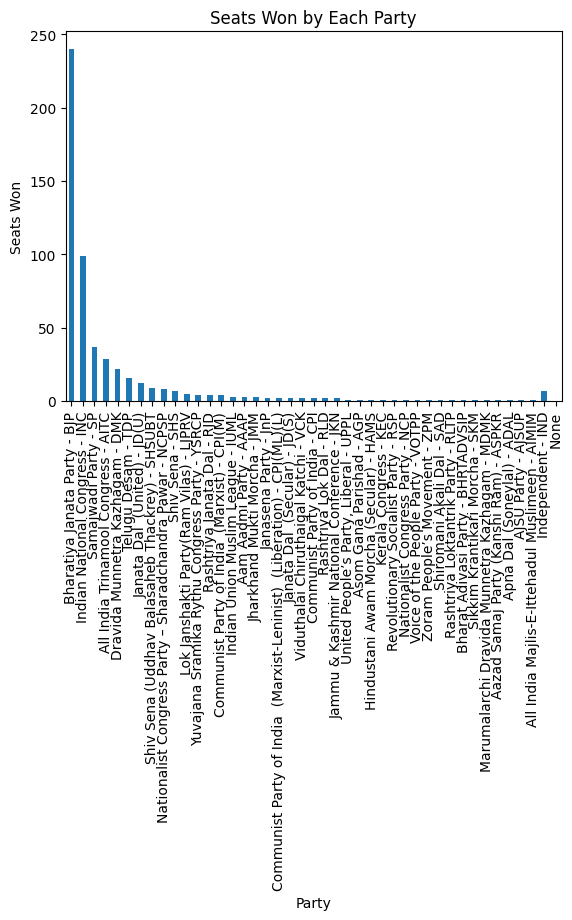

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the table
table = soup.find('table', {'class': 'table'})  # Adjust class name as needed
rows = table.find_all('tr')

data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Create DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

# Print the first few rows
print(df.head())

# Replace None or empty strings with '0' and remove commas
df['Won'] = df['Won'].replace('', '0').fillna('0')
df['Won'] = df['Won'].str.replace(',', '').astype(int)

# Filter the DataFrame
filtered_df = df[df['Won'] > 30]
print(filtered_df)

# Plotting the 'Won' column
df.set_index('Party')['Won'].plot(kind='bar', legend=False)
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party')
plt.xticks(rotation=90)
plt.show()


Seats won by each ruling party:
Bharatiya Janata Party - BJP : 240
Telugu Desam - TDP : 16
Janata Dal  (United) - JD(U) : 12
Shiv Sena - SHS : 7
Lok Janshakti Party(Ram Vilas) - LJPRV : 5
Janasena Party - JnP : 2
Janata Dal  (Secular) - JD(S) : 2
Rashtriya Lok Dal - RLD : 2
United People’s Party, Liberal - UPPL : 1
Asom Gana Parishad - AGP : 1
Hindustani Awam Morcha (Secular) - HAMS : 1
Nationalist Congress Party - NCP : 1
Shiromani Akali Dal - SAD : 1
Sikkim Krantikari Morcha - SKM : 1
Apna Dal (Soneylal) - ADAL : 1


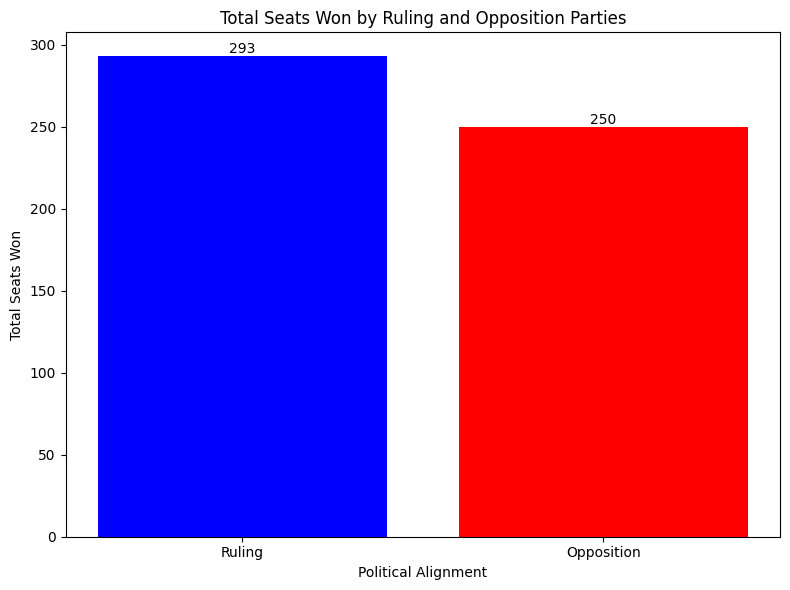

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the table
table = soup.find('table', {'class': 'table'})  # Adjust class name as needed
rows = table.find_all('tr')

data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Create DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

# Clean up and convert 'Won' column to integers
df['Won'] = df['Won'].replace('', '0').fillna('0')
df['Won'] = df['Won'].str.replace(',', '').astype(int)

# Assign 'Ruling' or 'Opposition' status based on known ruling parties
ruling_parties = ['Bharatiya Janata Party - BJP', 'Shiv Sena - SHS', 'Telugu Desam - TDP', 'Lok Janshakti Party(Ram Vilas) - LJPRV', 'Shiromani Akali Dal - SAD', 'Apna Dal (Soneylal) - ADAL', 'Nationalist Congress Party - NCP', 'Apna Dal (Soneylal) - ADAL', 'Janata Dal  (United) - JD(U)', 'Janata Dal  (Secular) - JD(S)', 'Asom Gana Parishad - AGP', 'Janasena Party - JnP', 'Rashtriya Lok Dal - RLD', 'Hindustani Awam Morcha (Secular) - HAMS', 'Sikkim Krantikari Morcha - SKM', 'United People’s Party, Liberal - UPPL']  # Adjust with actual ruling party names

# Create 'Status' column
df['Status'] = df['Party'].apply(lambda x: 'Ruling' if x in ruling_parties else 'Opposition')

# Filter for ruling parties and print their seats separately
ruling_df = df[df['Status'] == 'Ruling']
print("Seats won by each ruling party:")
for index, row in ruling_df.iterrows():
    print(row['Party'], ":", row['Won'])

# Calculate total seats won by ruling and opposition parties
total_ruling_seats = ruling_df['Won'].sum()
total_opposition_seats = df[df['Status'] == 'Opposition']['Won'].sum()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the total seats won
bars = ax.bar(['Ruling', 'Opposition'], [total_ruling_seats, total_opposition_seats], color=['blue', 'red'])

ax.set_xlabel('Political Alignment')
ax.set_ylabel('Total Seats Won')
ax.set_title('Total Seats Won by Ruling and Opposition Parties')

# Add exact count on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

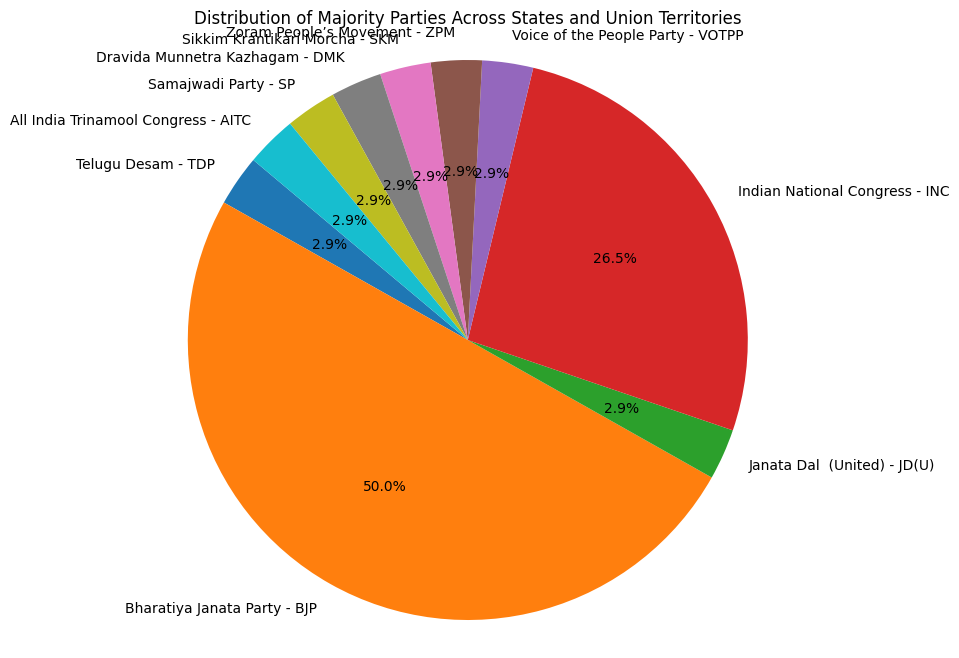

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to scrape and process data from a specific entity (state or UT) URL
def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Identify and scrape the relevant table
        table = soup.find('table', class_='table')  # Adjust class name as needed
        if table is None:
            raise ValueError(f"No table found with class 'table' on {entity_url}")

        rows = table.find_all('tr')

        data = []
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        # Create DataFrame with appropriate column names
        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

        # Clean up and convert 'Won' column to integers
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        # Find the party with the maximum seats (majority)
        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()  # Assuming state name is in an <h2> tag
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error scraping {entity_url}: {e}")
        return None, None

# Example: Generate URLs for each state and Union Territory
base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]  # Generate URLs for states S01 to S29 excluding S09
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]  # Generate URLs for UTs U01 to U07 excluding U04

# List to store state names and parties with majority seats
state_majority_parties = []

# Scrape data for states
for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Scrape data for Union Territories
for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Extract party names and their counts
party_counts = {}
for _, party in state_majority_parties:
    if party in party_counts:
        party_counts[party] += 1
    else:
        party_counts[party] = 1

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(party_counts.values(), labels=party_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Majority Parties Across States and Union Territories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

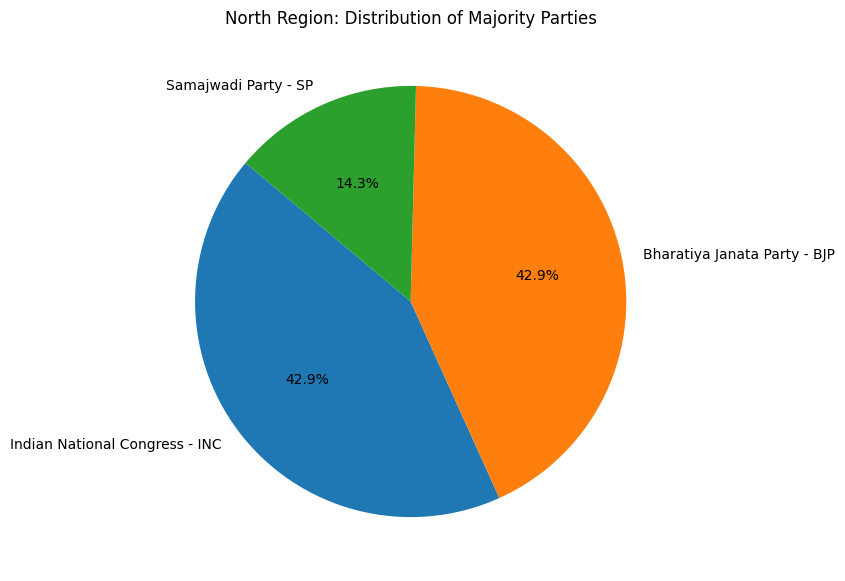

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to scrape and process data from a specific entity (state or UT) URL
def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Identify and scrape the relevant table
        table = soup.find('table', class_='table')  # Adjust class name as needed
        if table is None:
            raise ValueError(f"No table found with class 'table' on {entity_url}")

        rows = table.find_all('tr')

        data = []
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        # Create DataFrame with appropriate column names
        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

        # Clean up and convert 'Won' column to integers
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        # Find the party with the maximum seats (majority)
        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()  # Assuming state name is in an <h2> tag
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error scraping {entity_url}: {e}")
        return None, None

# Example: Generate URLs for each state and Union Territory
base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]  # Generate URLs for states S01 to S29 excluding S09
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]  # Generate URLs for UTs U01 to U07 excluding U04

# List to store state names and parties with majority seats
state_majority_parties = []

# Scrape data for states
for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Scrape data for Union Territories
for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Extract party names and their counts
party_counts = {}
for _, party in state_majority_parties:
    if party in party_counts:
        party_counts[party] += 1
    else:
        party_counts[party] = 1

# North Region Pie Chart
north_counts = region_party_counts['North']
plt.figure(figsize=(7, 7))
plt.pie(north_counts.values(), labels=north_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('North Region: Distribution of Majority Parties')
plt.show()


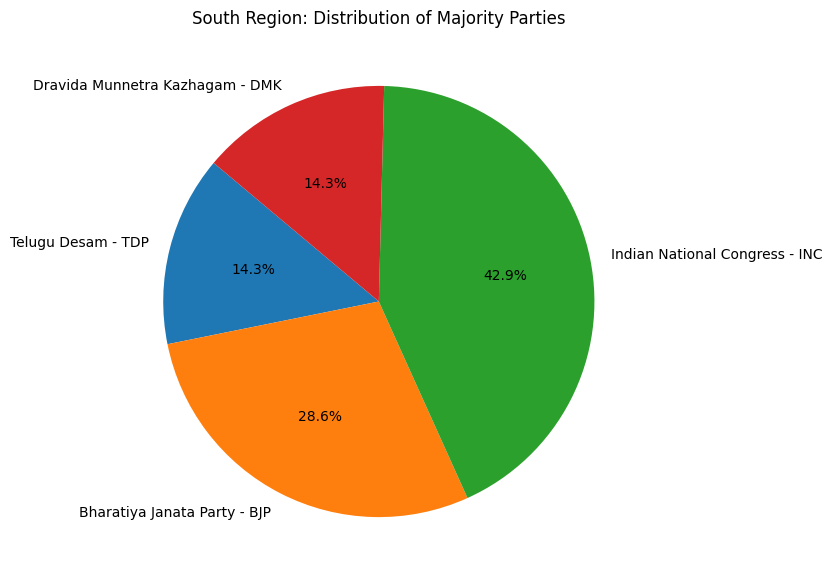

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to scrape and process data from a specific entity (state or UT) URL
def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Identify and scrape the relevant table
        table = soup.find('table', class_='table')  # Adjust class name as needed
        if table is None:
            raise ValueError(f"No table found with class 'table' on {entity_url}")

        rows = table.find_all('tr')

        data = []
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        # Create DataFrame with appropriate column names
        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

        # Clean up and convert 'Won' column to integers
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        # Find the party with the maximum seats (majority)
        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()  # Assuming state name is in an <h2> tag
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error scraping {entity_url}: {e}")
        return None, None

# Example: Generate URLs for each state and Union Territory
base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]  # Generate URLs for states S01 to S29 excluding S09
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]  # Generate URLs for UTs U01 to U07 excluding U04

# List to store state names and parties with majority seats
state_majority_parties = []

# Scrape data for states
for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Scrape data for Union Territories
for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Extract party names and their counts
party_counts = {}
for _, party in state_majority_parties:
    if party in party_counts:
        party_counts[party] += 1
    else:
        party_counts[party] = 1

# South Region Pie Chart
south_counts = region_party_counts['South']
plt.figure(figsize=(7, 7))
plt.pie(south_counts.values(), labels=south_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('South Region: Distribution of Majority Parties')
plt.show()


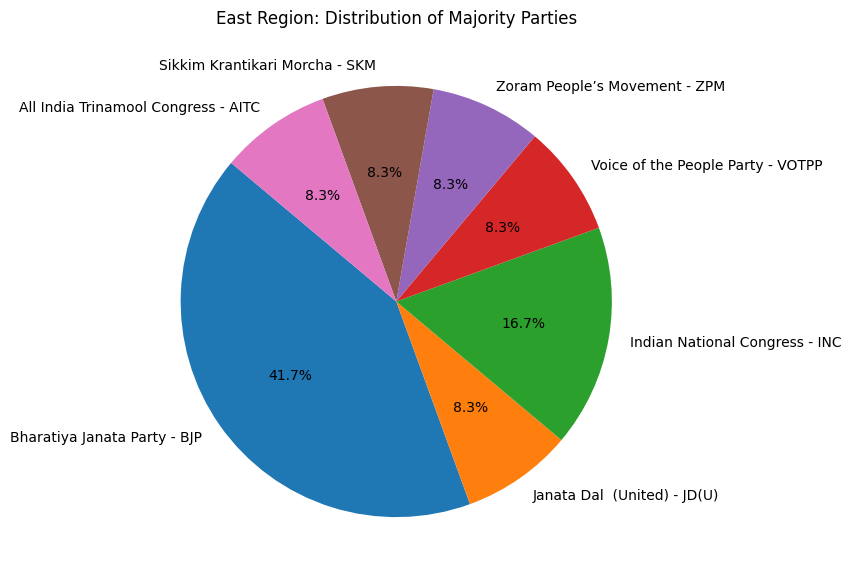

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to scrape and process data from a specific entity (state or UT) URL
def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Identify and scrape the relevant table
        table = soup.find('table', class_='table')  # Adjust class name as needed
        if table is None:
            raise ValueError(f"No table found with class 'table' on {entity_url}")

        rows = table.find_all('tr')

        data = []
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        # Create DataFrame with appropriate column names
        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

        # Clean up and convert 'Won' column to integers
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        # Find the party with the maximum seats (majority)
        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()  # Assuming state name is in an <h2> tag
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error scraping {entity_url}: {e}")
        return None, None

# Example: Generate URLs for each state and Union Territory
base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]  # Generate URLs for states S01 to S29 excluding S09
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]  # Generate URLs for UTs U01 to U07 excluding U04

# List to store state names and parties with majority seats
state_majority_parties = []

# Scrape data for states
for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Scrape data for Union Territories
for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Extract party names and their counts
party_counts = {}
for _, party in state_majority_parties:
    if party in party_counts:
        party_counts[party] += 1
    else:
        party_counts[party] = 1

# East Region Pie Chart
east_counts = region_party_counts['East']
plt.figure(figsize=(7, 7))
plt.pie(east_counts.values(), labels=east_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('East Region: Distribution of Majority Parties')
plt.show()



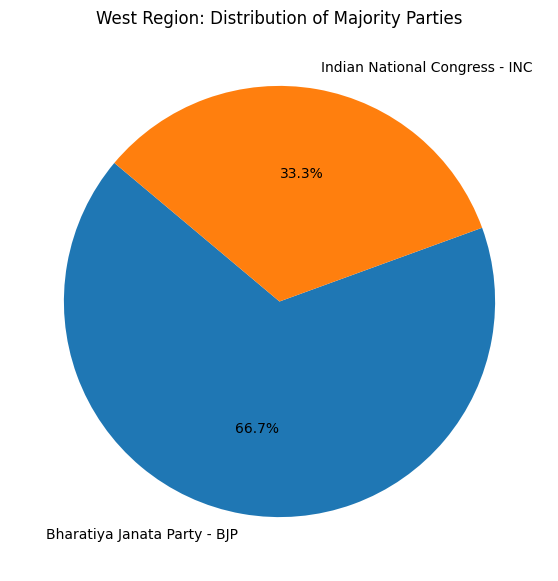

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to scrape and process data from a specific entity (state or UT) URL
def scrape_and_process_entity_data(entity_url):
    try:
        response = requests.get(entity_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Identify and scrape the relevant table
        table = soup.find('table', class_='table')  # Adjust class name as needed
        if table is None:
            raise ValueError(f"No table found with class 'table' on {entity_url}")

        rows = table.find_all('tr')

        data = []
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)

        # Create DataFrame with appropriate column names
        df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])  # Adjust column names

        # Clean up and convert 'Won' column to integers
        df['Won'] = df['Won'].replace('', '0').fillna('0')
        df['Won'] = df['Won'].str.replace(',', '').astype(int)

        # Find the party with the maximum seats (majority)
        max_won_index = df['Won'].idxmax()
        state_name = soup.find('h2').text.strip()  # Assuming state name is in an <h2> tag
        party_with_majority = df.loc[max_won_index, 'Party']

        return state_name, party_with_majority

    except Exception as e:
        print(f"Error scraping {entity_url}: {e}")
        return None, None

# Example: Generate URLs for each state and Union Territory
base_state_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S"
base_ut_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U"

state_urls = [base_state_url + f"{i:02}.htm" for i in range(1, 30) if i != 9]  # Generate URLs for states S01 to S29 excluding S09
ut_urls = [base_ut_url + f"{i:02}.htm" for i in range(1, 8) if i != 4]  # Generate URLs for UTs U01 to U07 excluding U04

# List to store state names and parties with majority seats
state_majority_parties = []

# Scrape data for states
for state_url in state_urls:
    state_name, majority_party = scrape_and_process_entity_data(state_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Scrape data for Union Territories
for ut_url in ut_urls:
    state_name, majority_party = scrape_and_process_entity_data(ut_url)
    if state_name is not None and majority_party is not None:
        state_majority_parties.append((state_name, majority_party))

# Extract party names and their counts
party_counts = {}
for _, party in state_majority_parties:
    if party in party_counts:
        party_counts[party] += 1
    else:
        party_counts[party] = 1

# West Region Pie Chart
west_counts = region_party_counts['West']
plt.figure(figsize=(7, 7))
plt.pie(west_counts.values(), labels=west_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('West Region: Distribution of Majority Parties')
plt.show()



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lok_sabha_election_results_2024.csv to lok_sabha_election_results_2024 (1).csv


Index(['Constituency', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin'],
      dtype='object')


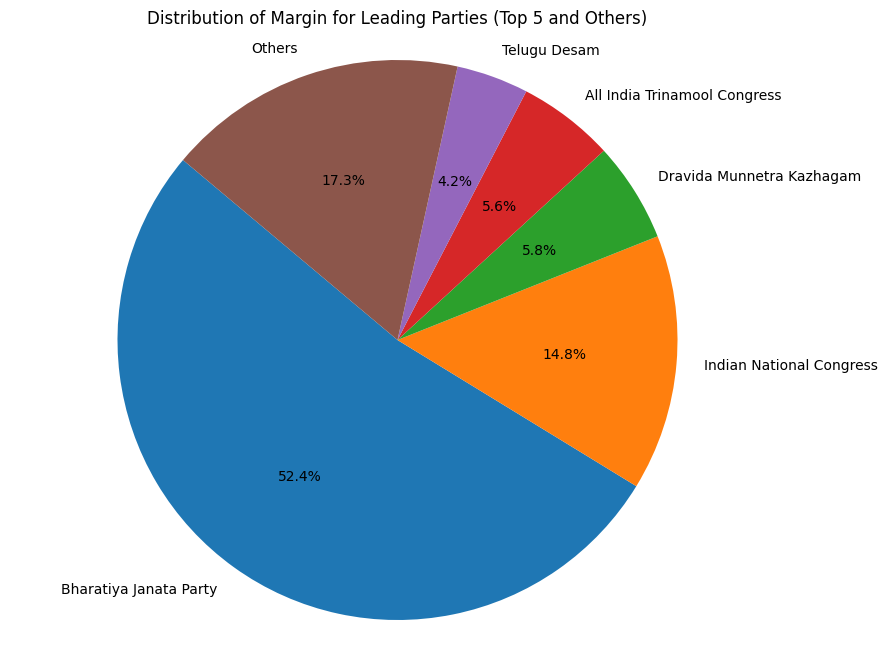

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Print the column names to verify
print(df.columns)

# Clean the 'Margin' column by removing non-numeric characters
df['Margin'] = df['Margin'].str.replace('[^\d]', '', regex=True)

# Convert 'Margin' column to numeric, forcing errors to NaN
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Drop rows with NaN values in 'Margin'
df = df.dropna(subset=['Margin'])

# Group by 'Leading Party' and sum the 'Margin'
party_margin = df.groupby('Leading Party')['Margin'].sum().reset_index()

# Sort the data to get the top parties
party_margin = party_margin.sort_values(by='Margin', ascending=False)

# Identify the top five parties
top_five_parties = party_margin.head(5)

# Sum the margins for the remaining parties
others_margin = party_margin[5:]['Margin'].sum()

# Create a new DataFrame for the top five parties and 'Others'
others_df = pd.DataFrame({'Leading Party': ['Others'], 'Margin': [others_margin]})
top_five_and_others = pd.concat([top_five_parties, others_df], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_five_and_others['Margin'], labels=top_five_and_others['Leading Party'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Margin for Leading Parties (Top 5 and Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_election_result_data.csv to final_election_result_data.csv


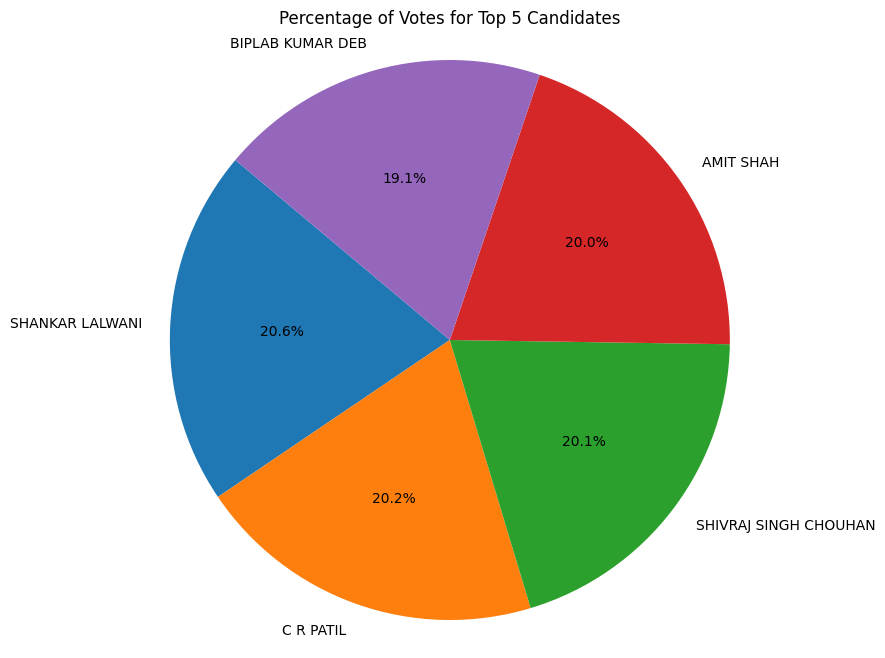

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Ensure the necessary columns are present and convert them to numeric types
df['Total Votes'] = df['Total Votes'].str.replace(',', '').str.replace('-', '0').astype(int)  # Handling hyphens and commas
df['Percent Votes'] = df['Percent Votes'].str.replace(',', '').str.replace('-', '0').astype(float)  # Handling hyphens and commas

# Sort by percentage of votes
df = df.sort_values(by='Percent Votes', ascending=False)

# Select the top 5 candidates by percentage of votes
top_candidates = df.head(5)

# Plotting the pie chart for top 5 candidates
plt.figure(figsize=(10, 8))
plt.pie(top_candidates['Percent Votes'], labels=top_candidates['Candidate Name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Votes for Top 5 Candidates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving final_election_result_data.csv to final_election_result_data (2).csv


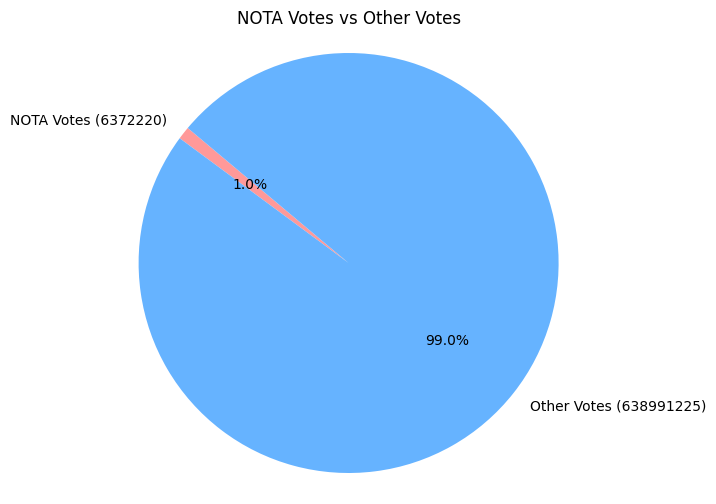

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the uploaded file is named 'election_results.csv'
file_name = list(uploaded.keys())[0]  # Get the file name dynamically

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Ensure the necessary columns are present and convert them to numeric types
df['Total Votes'] = df['Total Votes'].str.replace(',', '').str.replace('-', '0').astype(int)

# Calculate total votes for NOTA and others
nota_votes = df[df['Candidate Name'].str.contains('NOTA', case=False)]['Total Votes'].sum()
other_votes = df[~df['Candidate Name'].str.contains('NOTA', case=False)]['Total Votes'].sum()

# Prepare data for plotting
labels = [f'NOTA Votes ({nota_votes})', f'Other Votes ({other_votes})']
votes = [nota_votes, other_votes]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(votes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('NOTA Votes vs Other Votes')
plt.axis('equal')
plt.show()
